In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import time
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv("kitapyorum/tb1.csv")

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405559 entries, 0 to 405558
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Puan    405559 non-null  int64 
 1   Yorum   405559 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.2+ MB


### Duplicate eden yorumları siliyorum 

In [4]:
duplicate_rows = df[df.duplicated()]

df1 = df.drop_duplicates()


1433 yorum duplicate edilmiş, bu yüzden silindi

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404126 entries, 0 to 404636
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Puan    404126 non-null  int64 
 1   Yorum   404126 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.2+ MB


5    294353
4     71590
3     25809
2      7173
1      5201
Name: Puan, dtype: int64


/Users/oner/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


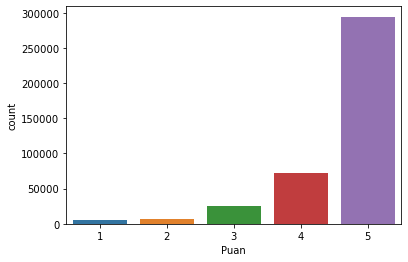

In [6]:
sns.countplot(df1["Puan"])
print(df1['Puan'].value_counts())

----

### Olumsuz yorum ile olumlu yorumları eşitleme ## 
1. Yöntem olarak  5201 adet 1 yıldız (olumsuz) ve 5201 adet 5 yıldız(olumlu) yorum alarak 10.402 yorum ile çalışacağım.
2. Yöntem olarak  5201 adet 1, 7173 adet 2 yıldız toplam 12374 adet olumsuz yorum, ve 12374 adet 5 yıldız olumlu olarak alarak 24748 adet yorum ile çalışacağım

### 1. Yöntem CSV

In [7]:
df2 = df1[df1['Puan'] == 5].tail(5201)
df3 = df1[df1['Puan'] == 1].tail(5201)
df_list = [df2, df3]
df4 = pd.concat(df_list,ignore_index=True)

In [8]:
print(df4['Puan'].value_counts())

5    5201
1    5201
Name: Puan, dtype: int64


Verileri karıştırıp stopwordleri silme ve yeni csv olarak kaydetme.

In [9]:
df4 = df4.sample(10402)

In [10]:
yorumlar = df4['Yorum']
stop_words = stopwords.words('turkish')

In [11]:
stop_words

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [12]:
def remove_stopwords(yorum):
    yorum_listesi = yorum.split() # yorumu kelimelere ayırır
    yeni_yorum = [] # stopwordleri çıkartılmış yorumu bu listeye ekleyeceğiz
    for kelime in yorum_listesi: # yorumdaki her bir kelime için
        if kelime not in stop_words: # kelime stopword değilse
            yeni_yorum.append(kelime) # yeni_yorum listesine ekle
    return ' '.join(yeni_yorum) # listeyi tekrar cümle haline getirip döndür

yorumlar_stopword_cikarilmis = yorumlar.apply(remove_stopwords)

In [13]:
print(yorumlar_stopword_cikarilmis)

3835                     Bu fiyata kitaplar kaçırılmamalı
6370    Ramtha seminerlerinde illuminati sembolleri ba...
8664    Nihat Sırdar ın dönemin şartlarını içeren biyo...
9283    Çocukların belli bir yaşa kadar okumaması gere...
3397    bağımsız öyküleri severek okusam sorusuna enge...
                              ...                        
3366                    bazen sıktı yınede tavsıye ederım
8303    Kitabın içindeki şeyler sürekli tekrar ediyor ...
838     Yeğenim almıştım Bende okudum gerçekten guzel ...
9737    Füruzan ın okuduğum ilk kitabıdır Vasat bir ki...
553                                  süperrrr sevdim bunu
Name: Yorum, Length: 10402, dtype: object


In [14]:
df5 = df4.copy() # comments dataframe'ini kopyalayın
df5['Yorum'] = yorumlar_stopword_cikarilmis # yorumlar sütununu güncelleyin


In [15]:
df5.loc[df5['Puan'] == 1, 'Puan'] = 0
df5.loc[df5['Puan'] == 5, 'Puan'] = 1

In [16]:
print(df5['Puan'].value_counts())

1    5201
0    5201
Name: Puan, dtype: int64


In [17]:
df5.to_csv('kitap_yorum_10402.csv', index=False)

### 2.Yöntem CSV

## 2 puanlı yorumları 1 puana dönüştürüyorum. 

In [18]:
df1.loc[df['Puan'] == 2, 'Puan'] = 1

5    294353
4     71590
3     25809
1     12374
Name: Puan, dtype: int64


/Users/oner/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


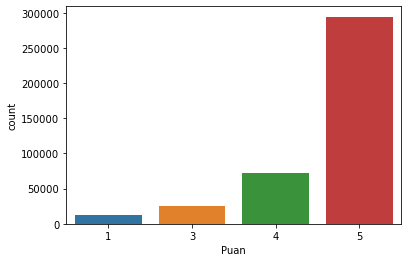

In [19]:
sns.countplot(df1["Puan"])
print(df1['Puan'].value_counts())

In [20]:
df6 = df1[df1['Puan'] == 5].tail(12374)
df7 = df1[df1['Puan'] == 1].tail(12374)
df_list = [df6, df7]
df8 = pd.concat(df_list,ignore_index=True)

In [21]:
df8 = df8.sample(24748)

### Stopwordlerin çıkarılması

In [22]:
yorumlar = df8['Yorum']
stop_words = stopwords.words('turkish')

In [23]:
stop_words

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [24]:
def remove_stopwords(yorum):
    yorum_listesi = yorum.split() # yorumu kelimelere ayırır
    yeni_yorum = [] # stopwordleri çıkartılmış yorumu bu listeye ekleyeceğiz
    for kelime in yorum_listesi: # yorumdaki her bir kelime için
        if kelime not in stop_words: # kelime stopword değilse
            yeni_yorum.append(kelime) # yeni_yorum listesine ekle
    return ' '.join(yeni_yorum) # listeyi tekrar cümle haline getirip döndür

yorumlar_stopword_cikarilmis = yorumlar.apply(remove_stopwords)

In [25]:
print(yorumlar_stopword_cikarilmis)

16289    basit yalın dili var anlamsız ilkokul kitapı g...
20461    Ben bütün olmayan konulardan pek hoşlanmadığım...
23842    Murakami nin etkisiz kitabı benim A wild sheep...
18232    Değinilen konular güzel fakat aynı şeyler süre...
9367     Kutlu Hoca nın güzel eserini tekrar yayınlayan...
                               ...                        
12752    Kitabın ele aldığı konu çıkış noktası etkileyi...
989               Auster in okunması gereken kitaplarından
10140    Müthiş bir kitap müthiş olmamasını gerektirice...
23319    İlkinde haksızlık ediyorum diyip ikinci bir ba...
22258    sanırım çeviriden dolayı kitap akıcı değil umd...
Name: Yorum, Length: 24748, dtype: object


In [26]:
df9 = df8.copy() # comments dataframe'ini kopyalayın
df9['Yorum'] = yorumlar_stopword_cikarilmis # yorumlar sütununu güncelleyin




### Bu aşamadan sonra 0 olumsuz yorum, 1 olumlu yorum olarak kodlanmıştır.

In [27]:
df9.loc[df9['Puan'] == 1, 'Puan'] = 0
df9.loc[df9['Puan'] == 5, 'Puan'] = 1

In [28]:
print(df9['Puan'].value_counts())

0    12374
1    12374
Name: Puan, dtype: int64


In [29]:
df9.to_csv('kitap_yorum_24748.csv', index=False)

In [30]:
df9

,Puan,Yorum
16289,0,basit yalın dili var anlamsız ilkokul kitapı g...
20461,0,Ben bütün olmayan konulardan pek hoşlanmadığım...
23842,0,Murakami nin etkisiz kitabı benim A wild sheep...
18232,0,Değinilen konular güzel fakat aynı şeyler süre...
9367,1,Kutlu Hoca nın güzel eserini tekrar yayınlayan...
...,...,...
12752,0,Kitabın ele aldığı konu çıkış noktası etkileyi...
989,1,Auster in okunması gereken kitaplarından
10140,1,Müthiş bir kitap müthiş olmamasını gerektirice...
23319,0,İlkinde haksızlık ediyorum diyip ikinci bir ba...


------

-----

# Makine Öğrenmesi Modelleri

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import sklearn.metrics as metrics





In [32]:
# CSV dosyasının okunması ve dataframe olarak yüklenmesi
df = pd.read_csv('kitap_yorum_10402.csv') ## Dataset-1 
df2 = pd.read_csv('kitap_yorum_24748.csv') ## Dataset-2


### Dataset -1- (10402 Yorum) düzenlenmesi

CountVectorizer, bir metin dosyasındaki kelimeleri sayılarına göre ölçeklendirir ve bu kelimeleri bir vektör olarak ifade eder. 


# Veri setinde kullanılacak özelliklerin seçilmesi
X = df['Yorum'] # Yorumların sütunu
y = df['Puan'] # Etiketlerin sütunu


# Özelliklerin ölçeklendirilmesi
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Veri setinin eğitim %67  ve test %33 verilerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Veri setinde kullanılacak özelliklerin seçilmesi
X = df['Yorum'] # Yorumların sütunu
y = df['Puan'] # Etiketlerin sütunu


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

# Veri setinin eğitim %67  ve test %33 verilerine ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




### Dataset -2- (24748 Yorum)  verisetlerin düzenlenmesi

In [34]:
X2 = df2['Yorum'] 
y2 = df2['Puan']
vectorizer2 = CountVectorizer()
X2 = vectorizer2.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

## Logistik Regresyon Algoritması

In [35]:
## DataSet 1 ile Logistik Regresyon modelinin oluşturulması. 
lrmodel = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

lrmodel.fit(X_train, y_train)

basari = lrmodel.score(X_test, y_test)

print("Modelin Başarısı:", basari)

mod_file = 'lrmodel.model'
pickle.dump(lrmodel, open(mod_file, 'wb'))


Modelin Başarısı: 0.8566851150597146


              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1721
           1       0.84      0.88      0.86      1712

    accuracy                           0.86      3433
   macro avg       0.86      0.86      0.86      3433
weighted avg       0.86      0.86      0.86      3433



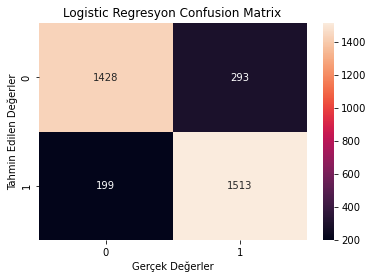

In [36]:
tahminler = lrmodel.predict(X_test)
print(metrics.classification_report(y_test,tahminler))
cm = confusion_matrix(y_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Logistic Regresyon Confusion Matrix')
plt.show()

In [37]:
## DataSet 2 ile Logistik Regresyon modelinin oluşturulması

lr2model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

lr2model.fit(X2_train, y2_train)

basari = lr2model.score(X2_test, y2_test)


print("Modelin Başarısı:", basari)

Modelin Başarısı: 0.8602914166768704


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4059
           1       0.84      0.88      0.86      4108

    accuracy                           0.86      8167
   macro avg       0.86      0.86      0.86      8167
weighted avg       0.86      0.86      0.86      8167



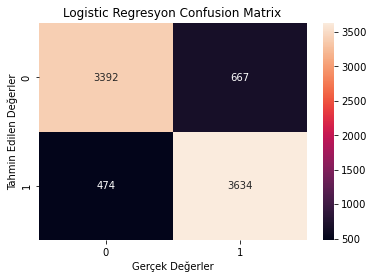

In [38]:
tahminler = lr2model.predict(X2_test)
print(metrics.classification_report(y2_test,tahminler))
cm = confusion_matrix(y2_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Logistic Regresyon Confusion Matrix')
plt.show()

## KNN Algoritması

In [74]:
## Dataset 1 ile Knn modelinin oluşturulması
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)

## Burada modeli kaydediyoruz. 
mod_file = 'knnmodel.model'
pickle.dump(knn, open(mod_file, 'wb'))

print("Modelin Başarısı:", knn_accuracy)

Modelin Başarısı: 0.6702592484707253


In [75]:
## k değeri 100'e kadar döndürüldü en ideal k değeri "3" belirlendi. Satır sayısı az olması için döngü 10
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    basari = knn.score(X_test, y_test)
    print("k =", i, "için doğruluk:", basari)

k = 2 için doğruluk: 0.66501602097291
k = 3 için doğruluk: 0.6851150597145353
k = 4 için doğruluk: 0.6941450626274396
k = 5 için doğruluk: 0.7098747451208856
k = 6 için doğruluk: 0.7017186134576172
k = 7 için doğruluk: 0.7090008738712497
k = 8 için doğruluk: 0.7057966792892514
k = 9 için doğruluk: 0.7078357122050685


              precision    recall  f1-score   support

           0       0.73      0.66      0.69      1721
           1       0.69      0.76      0.72      1712

    accuracy                           0.71      3433
   macro avg       0.71      0.71      0.71      3433
weighted avg       0.71      0.71      0.71      3433



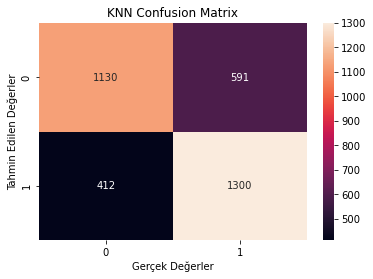

In [41]:
tahminler = knn.predict(X_test)
print(metrics.classification_report(y_test,tahminler))
cm = confusion_matrix(y_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('KNN Confusion Matrix')
plt.show()

In [42]:
## Dataset 2 ile Knn modelinin oluşturulması
knn2 = KNeighborsClassifier(n_neighbors=15)

knn2.fit(X2_train, y2_train)

knn_accuracy2 = knn2.score(X2_test, y2_test)


print("Başarı:", knn_accuracy2)

Başarı: 0.7191135055712011


In [43]:
## k değeri 100'e kadar döndürüldü en ideal k değeri "15" belirlendi. Satır sayısı az olması için döngü 16
for i in range(2,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X2_train, y2_train)
    basari = knn.score(X2_test, y2_test)
    print("k =", i, "için doğruluk:", basari)

k = 2 için doğruluk: 0.6538508632300722
k = 3 için doğruluk: 0.7006244643075793
k = 4 için doğruluk: 0.6850740786090364
k = 5 için doğruluk: 0.7088282110934248
k = 6 için doğruluk: 0.6951144851230562
k = 7 için doğruluk: 0.7160524060242439
k = 8 için doğruluk: 0.7028284559813885
k = 9 için doğruluk: 0.71776662177054
k = 10 için doğruluk: 0.7052773356189543
k = 11 için doğruluk: 0.7202155014081058
k = 12 için doğruluk: 0.7102975388759643
k = 13 için doğruluk: 0.7166646259336353
k = 14 için doğruluk: 0.7094404310028162
k = 15 için doğruluk: 0.7191135055712011


              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4059
           1       0.73      0.71      0.72      4108

    accuracy                           0.72      8167
   macro avg       0.72      0.72      0.72      8167
weighted avg       0.72      0.72      0.72      8167



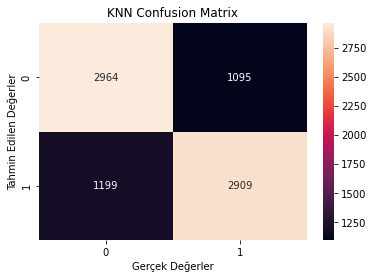

In [44]:
tahminler = knn2.predict(X2_test)
print(metrics.classification_report(y2_test,tahminler))
cm = confusion_matrix(y2_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('KNN Confusion Matrix')
plt.show()

## Decision Tree Algoritması

In [45]:
## Dataset 1 ile Decision Tree modelinin oluşturulması
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

result = dt.score(X_test, y_test)

## Burada modeli kaydediyoruz. 
mod_file = 'dtmodel.model'
pickle.dump(dt, open(mod_file, 'wb'))

print("Modelin Başarısı:", result)


Modelin Başarısı: 0.7856102534226624


              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1721
           1       0.77      0.81      0.79      1712

    accuracy                           0.79      3433
   macro avg       0.79      0.79      0.79      3433
weighted avg       0.79      0.79      0.79      3433



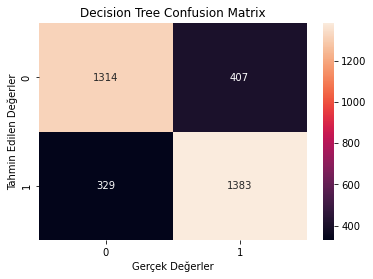

In [46]:
tahminler = dt.predict(X_test)
print(metrics.classification_report(y_test,tahminler))
cm = confusion_matrix(y_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [47]:
## Dataset 2 ile Decision Tree modelinin oluşturulması
dt2 = DecisionTreeClassifier()

dt2.fit(X2_train, y2_train)

result = dt2.score(X2_test, y2_test)

print("Modelin Başarısı:", result)

Modelin Başarısı: 0.7827843761479123


              precision    recall  f1-score   support

           0       0.79      0.77      0.78      4059
           1       0.78      0.80      0.79      4108

    accuracy                           0.78      8167
   macro avg       0.78      0.78      0.78      8167
weighted avg       0.78      0.78      0.78      8167



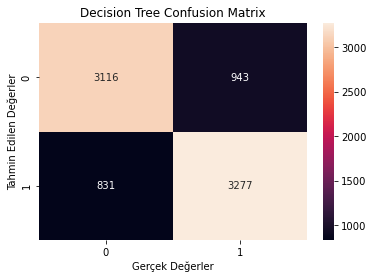

In [48]:
tahminler = dt2.predict(X2_test)
print(metrics.classification_report(y2_test,tahminler))
cm = confusion_matrix(y2_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## Random Forest Algoritması

In [49]:
## Dataset 1 ile Random Forest modelinin oluşturulması
rfc = RandomForestClassifier()


rfc.fit(X_train, y_train)

basari = rfc.score(X_test, y_test)
## Burada modeli kaydediyoruz. 
mod_file = 'rfcmodel.model'
pickle.dump(rfc, open(mod_file, 'wb'))

print('Modelin başarısı:', basari)


Modelin başarısı: 0.837459947567725


              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1721
           1       0.81      0.88      0.84      1712

    accuracy                           0.84      3433
   macro avg       0.84      0.84      0.84      3433
weighted avg       0.84      0.84      0.84      3433



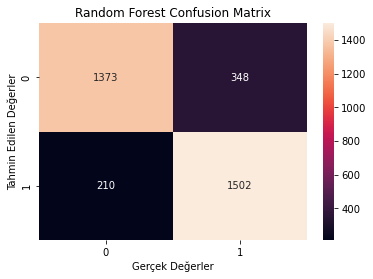

In [50]:
tahminler = rfc.predict(X_test)
print(metrics.classification_report(y_test,tahminler))
cm = confusion_matrix(y_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [51]:
## Dataset 2 ile Random Forest modelinin oluşturulması

rfc2 = RandomForestClassifier()


rfc2.fit(X2_train, y2_train)

basari = rfc2.score(X2_test, y2_test)


print('Modelin başarısı:', basari)


Modelin başarısı: 0.8384963879025346


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4059
           1       0.83      0.85      0.84      4108

    accuracy                           0.84      8167
   macro avg       0.84      0.84      0.84      8167
weighted avg       0.84      0.84      0.84      8167



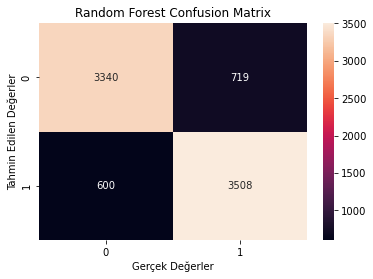

In [52]:
tahminler = rfc2.predict(X2_test)
print(metrics.classification_report(y2_test,tahminler))
cm = confusion_matrix(y2_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Support Vector Machine Algoritması

In [53]:
#Dataset 1 ile SVM modelinin oluşturulması

svm_model = svm.SVC(kernel = 'linear')

svm_model.fit(X_train, y_train)

basari = svm_model.score(X_test, y_test)
## Burada modeli kaydediyoruz. 
mod_file = 'svmmodel.model'
pickle.dump(svm_model, open(mod_file, 'wb'))

print('Modelin başarısı:', basari)

Modelin başarısı: 0.8485289833964462


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1721
           1       0.83      0.87      0.85      1712

    accuracy                           0.85      3433
   macro avg       0.85      0.85      0.85      3433
weighted avg       0.85      0.85      0.85      3433



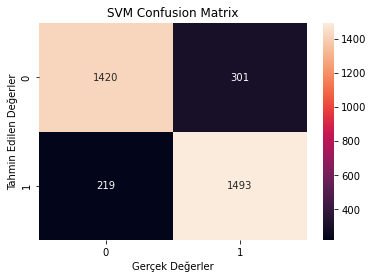

In [54]:
tahminler = svm_model.predict(X_test)
print(metrics.classification_report(y_test,tahminler))
cm = confusion_matrix(y_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('SVM Confusion Matrix')
plt.show()

In [55]:
#Dataset 2 ile SVM modelinin oluşturulması

svm_model2 = svm.SVC(kernel = 'linear')

svm_model2.fit(X2_train, y2_train)

basari = svm_model2.score(X2_test, y2_test)

print('Modelin başarısı:', basari)

Modelin başarısı: 0.8444961430145709


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4059
           1       0.84      0.86      0.85      4108

    accuracy                           0.84      8167
   macro avg       0.84      0.84      0.84      8167
weighted avg       0.84      0.84      0.84      8167



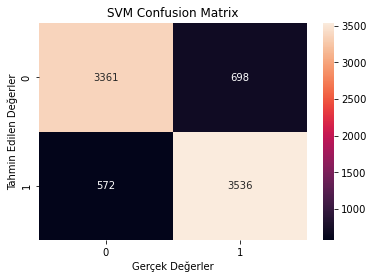

In [56]:
tahminler = svm_model2.predict(X2_test)
print(metrics.classification_report(y2_test,tahminler))
cm = confusion_matrix(y2_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('SVM Confusion Matrix')
plt.show()

## Support Vector Machine Algoritması

In [57]:
from sklearn.naive_bayes import MultinomialNB        # using multiNomial Naive Bayes as classifier

MNB= MultinomialNB()
MNB.fit(X_train, y_train)

basari = MNB.score(X_test, y_test)
## Burada modeli kaydediyoruz. 
mod_file = 'MNBmodel.model'
pickle.dump(MNB, open(mod_file, 'wb'))

print('Modelin başarısı:', basari)


Modelin başarısı: 0.8695018933877076


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1721
           1       0.86      0.88      0.87      1712

    accuracy                           0.87      3433
   macro avg       0.87      0.87      0.87      3433
weighted avg       0.87      0.87      0.87      3433



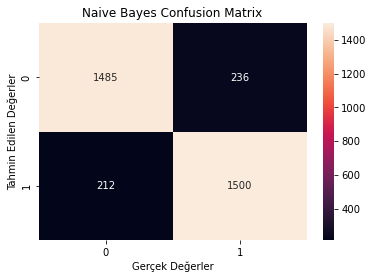

In [58]:
tahminler = MNB.predict(X_test)
print(metrics.classification_report(y_test,tahminler))
cm = confusion_matrix(y_test, tahminler)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

----

# Test Aşaması

In [82]:
text1 = "Kitabın sayfa sayısı çok fazla olmasına rağmen içi boş"
text2 = "Verdiğim paraya değecek bir kitaptı"
text3 = "Sevdiğim yazar ve ilgimi çeken bir konu olmasına rağmen güzel bir kitap sayılmaz"
text4 = "Okuduğum en başarılı kitaplardan biri"
text5 = "Karakterler, hikaye akışı, kitabın kapağı rezalet berbat ötesi elle tutulur hiç bir yanı yok "
text6 = "Okuduğum zamana yazık "
text7 = "Bu kitabı basan yayınevi batsın gitsin kesilen ağaca yazık"
text8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürünü geri iade ediyorum"
text9 = "Kalitenin buram buram koktuğu bir kitap"
text10 = "Gayet akıcı bir kitap."
yazilar = [text1, text2, text3, text4, text5, text6, text7, text8, text9, text10]
loaded_vectorizer = pickle.load(open('vectorizer.pickle', 'rb'))
vector= loaded_vectorizer.transform(yazilar)

## Logistik Regresyon

In [83]:
# load the model
loaded_lrmodel = pickle.load(open('lrmodel.model', 'rb'))
testlr=loaded_lrmodel.predict(vector)
print(testlr)
for i in range(len(yazilar)):
    if testlr[i]==1:
        print(i+1,". Cümle Olumlu")
    else:
        print(i+1,". Cümle Olumsuz")

[0 1 1 1 0 0 0 0 1 1]
1 . Cümle Olumsuz
2 . Cümle Olumlu
3 . Cümle Olumlu
4 . Cümle Olumlu
5 . Cümle Olumsuz
6 . Cümle Olumsuz
7 . Cümle Olumsuz
8 . Cümle Olumsuz
9 . Cümle Olumlu
10 . Cümle Olumlu


## KNN 

In [84]:
# load the model
loaded_knnmodel = pickle.load(open('knnmodel.model', 'rb'))
testknn=loaded_knnmodel.predict(vector)
print(testknn)
for i in range(len(yazilar)):
    if testknn[i]==1:
        print(i+1,". Cümle Olumlu")
    else:
        print(i+1,". Cümle Olumsuz")

[0 0 0 1 1 0 0 0 0 0]
1 . Cümle Olumsuz
2 . Cümle Olumsuz
3 . Cümle Olumsuz
4 . Cümle Olumlu
5 . Cümle Olumlu
6 . Cümle Olumsuz
7 . Cümle Olumsuz
8 . Cümle Olumsuz
9 . Cümle Olumsuz
10 . Cümle Olumsuz


## Decision Tree

In [87]:
# load the model
loaded_dtmodel = pickle.load(open('dtmodel.model', 'rb'))
testdt=loaded_dtmodel.predict(vector)
print(testdt)
for i in range(len(yazilar)):
    if testdt[i]==1:
        print(i+1,". Cümle Olumlu")
    else:
        print(i+1,". Cümle Olumsuz")

[0 1 1 1 0 0 0 0 1 1]
1 . Cümle Olumsuz
2 . Cümle Olumlu
3 . Cümle Olumlu
4 . Cümle Olumlu
5 . Cümle Olumsuz
6 . Cümle Olumsuz
7 . Cümle Olumsuz
8 . Cümle Olumsuz
9 . Cümle Olumlu
10 . Cümle Olumlu


## Random Forest

In [88]:
# load the model
loaded_rfcmodel = pickle.load(open('rfcmodel.model', 'rb'))
testrfc=loaded_rfcmodel.predict(vector)
print(testrfc)
for i in range(len(yazilar)):
    if testrfc[i]==1:
        print(i+1,". Cümle Olumlu")
    else:
        print(i+1,". Cümle Olumsuz")

[0 1 1 1 0 0 0 0 1 1]
1 . Cümle Olumsuz
2 . Cümle Olumlu
3 . Cümle Olumlu
4 . Cümle Olumlu
5 . Cümle Olumsuz
6 . Cümle Olumsuz
7 . Cümle Olumsuz
8 . Cümle Olumsuz
9 . Cümle Olumlu
10 . Cümle Olumlu


## Support Vector Machine

In [89]:
# load the model
loaded_svmmodel = pickle.load(open('svmmodel.model', 'rb'))
testsvm=loaded_svmmodel.predict(vector)
print(testsvm)
for i in range(len(yazilar)):
    if testsvm[i]==1:
        print(i+1,". Cümle Olumlu")
    else:
        print(i+1,". Cümle Olumsuz")

[0 1 1 1 0 0 0 0 1 1]
1 . Cümle Olumsuz
2 . Cümle Olumlu
3 . Cümle Olumlu
4 . Cümle Olumlu
5 . Cümle Olumsuz
6 . Cümle Olumsuz
7 . Cümle Olumsuz
8 . Cümle Olumsuz
9 . Cümle Olumlu
10 . Cümle Olumlu


## Naive Bayes

In [90]:
# load the model
loaded_MNBmodel = pickle.load(open('MNBmodel.model', 'rb'))
testnb=loaded_MNBmodel.predict(vector)
print(testnb)
for i in range(len(yazilar)):
    if testnb[i]==1:
        print(i+1,". Cümle Olumlu")
    else:
        print(i+1,". Cümle Olumsuz")

[0 0 0 1 0 0 0 0 1 1]
1 . Cümle Olumsuz
2 . Cümle Olumsuz
3 . Cümle Olumsuz
4 . Cümle Olumlu
5 . Cümle Olumsuz
6 . Cümle Olumsuz
7 . Cümle Olumsuz
8 . Cümle Olumsuz
9 . Cümle Olumlu
10 . Cümle Olumlu
